# Step 2: Preparing data for training

Objectives

- 3.1. Importing daily scores from news folder
- 3.2. Importing daily stock data from stock folder
- 3.3. Merge both the imported data with date
- 3.4. Saving the merged data
- 3.5. Check data by plotting the graph


In [2]:
import pandas as pd
import json

import matplotlib.pyplot as plt

### 3.1. Importing daily scores from news folder


In [3]:
with open('tcsdaily_scores.json', 'r') as file:
    sentimentScores = json.load(file)
#endwith

dfSentiment = pd.DataFrame(list(sentimentScores.items()), columns=['jsonDate', 'sentiment'])
dfSentiment['date'] = pd.to_datetime(dfSentiment['jsonDate'], format='%d %b %Y')

dfSentiment['date'] = dfSentiment['date'].dt.strftime('%Y-%m-%d')
dfSentiment['jsonDate'] = pd.to_datetime(dfSentiment['jsonDate'], format='%d %b %Y')
dfSentiment['jsonDate'] = dfSentiment['jsonDate'].dt.strftime('%Y-%m-%d')


dfSentiment.head()

,jsonDate,sentiment,date
0,2011-01-05,"[0.24576911330223083, 0.18289390206336975, 0.2...",2011-01-05
1,2011-01-06,"[0.22437281906604767, 0.221327543258667, 0.296...",2011-01-06
2,2011-01-07,"[0.1597469598054886, 0.18320223689079285, 0.29...",2011-01-07
3,2011-01-10,"[0.18042311072349548, 0.18414831161499023, 0.2...",2011-01-10
4,2011-01-11,"[0.14596858620643616, 0.17099711298942566, 0.2...",2011-01-11


### 3.2. Importing daily stock data from stock folder

- Data used will be of Habib Bank Limited (HBL)
- This bank is considered to be the top performing and one of the most profitable bank in the country [[Source: AsiaMoney](https://www.asiamoney.com/article/2bp0xnj0tjyfvvwhd8oow/awards/best-bank-awards/pakistans-best-domestic-bank-2023-hbl)]
- This bank has branches outside Pakistan as well


In [4]:
#csvFilePath = 'M:\miniproject\TCS_2013-01-01_to_2024_01-01.csv'
dfCsv = pd.read_csv("TCS_2013-01-01_to_2024_01-01.csv")
dfCsv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,633.474976,633.950012,630.000000,632.075012,504.629089,509580
1,2013-01-02,633.500000,636.200012,627.775024,631.650024,504.289795,1880246
2,2013-01-03,632.500000,642.000000,629.974976,640.299988,511.195435,2635130
3,2013-01-04,642.500000,650.500000,640.450012,649.599976,518.620483,5228760
4,2013-01-07,650.000000,652.000000,645.125000,647.424988,516.884277,1820752


### 3.3. Merge both the imported data with date


In [12]:
'''dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%Y-%m-%d')

dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')
dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: x if isinstance(x, list) else [0, 0, 0, 0, 0])#puting 0,0,0,0,0 if sentiment is not present
#dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: [0, 0, 0, 0, 0] if pd.isnan(x) else x)
#print(dfMerged['sentiment'].head(20))
dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])
dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)
#dfMerged.to_csv('merged_data.csv', index=False)
dfMerged = dfMerged.drop(columns=['date', 'sentiment', 'jsonDate'])
dfMerged.head(10)'''
# Convert 'Date' column in dfCsv to datetime
dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%Y-%m-%d')

# Convert 'date' column in dfSentiment to datetime
dfSentiment['date'] = pd.to_datetime(dfSentiment['date'], format='%Y-%m-%d')

# Merge dfCsv and dfSentiment on 'date'
dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')

# Replace non-list values in 'sentiment' with [0, 0, 0, 0, 0]
dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: x if isinstance(x, list) else [0, 0, 0, 0, 0])

# Split 'sentiment' list into separate columns
dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])

# Concatenate dfMerged and dfSentimentColumns
dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)

# Drop unnecessary columns
dfMerged = dfMerged.drop(columns=['date', 'sentiment', 'jsonDate'])

dfMerged.to_csv('merged_data.csv', index=False)
# Display the first 10 rows of dfMerged
dfMerged.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,feature1,feature2,feature3,feature4,feature5
0,2013-01-01,633.474976,633.950012,630.000000,632.075012,504.629089,509580,0.000000,0.000000,0.000000,0.000000,0.000000
1,2013-01-02,633.500000,636.200012,627.775024,631.650024,504.289795,1880246,0.000000,0.000000,0.000000,0.000000,0.000000
2,2013-01-03,632.500000,642.000000,629.974976,640.299988,511.195435,2635130,0.000000,0.000000,0.000000,0.000000,0.000000
3,2013-01-04,642.500000,650.500000,640.450012,649.599976,518.620483,5228760,0.059378,0.056069,0.135746,0.326171,0.422637
4,2013-01-07,650.000000,652.000000,645.125000,647.424988,516.884277,1820752,0.271674,0.296623,0.285677,0.099831,0.046195
5,2013-01-08,647.500000,652.150024,647.150024,650.125000,519.039612,2341870,0.093096,0.133798,0.231805,0.272953,0.268347
6,2013-01-09,650.500000,653.700012,636.575012,638.299988,509.598816,3135898,0.097328,0.161960,0.306329,0.268230,0.166153
7,2013-01-10,639.950012,641.049988,627.650024,629.200012,502.333710,4522838,0.144976,0.169639,0.258041,0.256329,0.171016
8,2013-01-11,645.000000,661.250000,645.000000,653.174988,521.474792,7805006,0.101090,0.119276,0.226637,0.256678,0.296319
9,2013-01-14,659.500000,674.224976,653.674988,667.250000,532.711731,5790224,0.124706,0.134374,0.250496,0.263625,0.226800


### 3.4. Saving the merged data

- Saving the file in CSV format ([tcs_feat.csv](tcs_feat.csv))


In [13]:
outputCsvPath = 'tcs_feat.csv'
dfMerged.to_csv(outputCsvPath, index=False)

### 3.5. Check data by plotting the graph


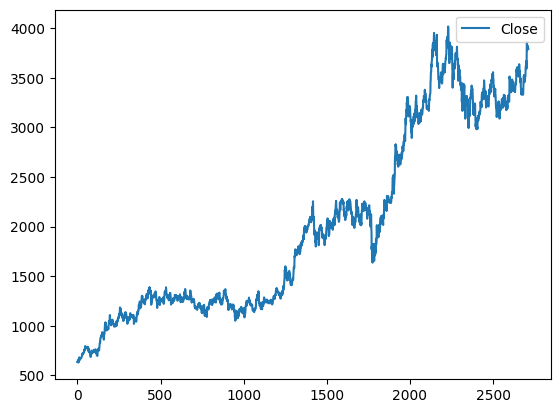

In [14]:
dfMerged[['Close']].plot()
plt.show()